## Global Temperature vs Precipitation Project


In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib
import copy

from pprint import pprint

import seaborn as sns
import missingno as msno


# First let's import the package
# pyplot is the interface we want to use
import matplotlib.pyplot as plt

# "matplotlib inline" creates static images of plot embedded in the notebook
%matplotlib inline

## Reading and cleaning the data set


In [2]:
# Let's begin with checking the data first
# df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df1900 = pd.read_csv('air_temp.1900', sep='\s+',  names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", "May",
                                                         "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
df1900.info()
df1900.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  85794 non-null  float64
 1   Latitude   85794 non-null  float64
 2   Jan        85794 non-null  float64
 3   Feb        85794 non-null  float64
 4   Mar        85794 non-null  float64
 5   Apr        85794 non-null  float64
 6   May        85794 non-null  float64
 7   Jun        85794 non-null  float64
 8   Jul        85794 non-null  float64
 9   Aug        85794 non-null  float64
 10  Sep        85794 non-null  float64
 11  Oct        85794 non-null  float64
 12  Nov        85794 non-null  float64
 13  Dec        85794 non-null  float64
dtypes: float64(14)
memory usage: 9.2 MB


,Longitude,Latitude,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-179.75,71.25,-26.9,-19.0,-22.6,-22.4,-8.0,-0.8,2.6,0.3,-2.9,-9.2,-12.0,-23.7
1,-179.75,68.75,-28.7,-21.2,-24.5,-24.4,-8.0,0.0,3.9,0.9,-2.8,-10.9,-13.8,-26.8
2,-179.75,68.25,-29.3,-22.0,-25.4,-25.2,-8.7,0.0,4.1,0.9,-3.5,-11.8,-14.8,-27.8
3,-179.75,67.75,-28.1,-20.8,-24.3,-24.3,-7.4,2.5,7.2,3.5,-2.1,-11.3,-14.4,-27.3
4,-179.75,67.25,-30.1,-23.3,-26.8,-26.7,-9.1,2.2,7.5,3.1,-3.9,-14.3,-17.5,-30.4


In [3]:
df1901 = pd.read_csv('air_temp.1901', sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
df1901.info()
df1901.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  85794 non-null  float64
 1   Latitude   85794 non-null  float64
 2   Jan        85794 non-null  float64
 3   Feb        85794 non-null  float64
 4   Mar        85794 non-null  float64
 5   Apr        85794 non-null  float64
 6   May        85794 non-null  float64
 7   Jun        85794 non-null  float64
 8   Jul        85794 non-null  float64
 9   Aug        85794 non-null  float64
 10  Sep        85794 non-null  float64
 11  Oct        85794 non-null  float64
 12  Nov        85794 non-null  float64
 13  Dec        85794 non-null  float64
dtypes: float64(14)
memory usage: 9.2 MB


,Longitude,Latitude,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-179.75,71.25,-31.0,-27.5,-28.0,-16.6,-9.2,0.1,1.7,0.8,-0.8,-7.5,-14.8,-18.8
1,-179.75,68.75,-33.4,-30.0,-30.6,-17.6,-8.9,0.7,2.9,1.4,-0.9,-8.9,-16.0,-20.5
2,-179.75,68.25,-34.1,-30.9,-31.7,-18.2,-9.5,0.6,3.2,1.5,-1.5,-9.7,-16.8,-21.4
3,-179.75,67.75,-32.9,-29.8,-30.9,-17.0,-8.1,3.1,6.2,4.0,-0.1,-9.2,-16.3,-20.7
4,-179.75,67.25,-34.9,-32.3,-33.8,-19.2,-9.7,2.7,6.6,3.6,-1.8,-12.2,-19.3,-23.6


In [4]:
horizontal_stack = pd.concat([df1900, df1901], axis=1)
horizontal_stack.info()
horizontal_stack.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  85794 non-null  float64
 1   Latitude   85794 non-null  float64
 2   Jan        85794 non-null  float64
 3   Feb        85794 non-null  float64
 4   Mar        85794 non-null  float64
 5   Apr        85794 non-null  float64
 6   May        85794 non-null  float64
 7   Jun        85794 non-null  float64
 8   Jul        85794 non-null  float64
 9   Aug        85794 non-null  float64
 10  Sep        85794 non-null  float64
 11  Oct        85794 non-null  float64
 12  Nov        85794 non-null  float64
 13  Dec        85794 non-null  float64
 14  Longitude  85794 non-null  float64
 15  Latitude   85794 non-null  float64
 16  Jan        85794 non-null  float64
 17  Feb        85794 non-null  float64
 18  Mar        85794 non-null  float64
 19  Apr        85794 non-null  float64
 20  May   

,Longitude,Latitude,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-179.75,71.25,-26.9,-19.0,-22.6,-22.4,-8.0,-0.8,2.6,0.3,...,-28.0,-16.6,-9.2,0.1,1.7,0.8,-0.8,-7.5,-14.8,-18.8
1,-179.75,68.75,-28.7,-21.2,-24.5,-24.4,-8.0,0.0,3.9,0.9,...,-30.6,-17.6,-8.9,0.7,2.9,1.4,-0.9,-8.9,-16.0,-20.5
2,-179.75,68.25,-29.3,-22.0,-25.4,-25.2,-8.7,0.0,4.1,0.9,...,-31.7,-18.2,-9.5,0.6,3.2,1.5,-1.5,-9.7,-16.8,-21.4
3,-179.75,67.75,-28.1,-20.8,-24.3,-24.3,-7.4,2.5,7.2,3.5,...,-30.9,-17.0,-8.1,3.1,6.2,4.0,-0.1,-9.2,-16.3,-20.7
4,-179.75,67.25,-30.1,-23.3,-26.8,-26.7,-9.1,2.2,7.5,3.1,...,-33.8,-19.2,-9.7,2.7,6.6,3.6,-1.8,-12.2,-19.3,-23.6


**Finding Mean Monthly Temperature for all locations:**

In [38]:
# Finding the mean temperature of all months over these 115 years
# means[0] = mean of all January temperatures for a location
# .
# .
# .
# means[11] = mean of all December temperatures for a location


# Open each of the 115 files and add headers to them. Then we concatenate them.
df = pd.read_csv('air_temp.1900', sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])

# We start with finding the mean for the month of January
means = []
means.append(df["Jan"]) 
means[0]

# This for loop goes from files of year 1901 to 2014
for x in range(1901,2015):
    yearS = str(x)
    tempDf = pd.read_csv('air_temp.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])
    # Appending every January to the list of means and finding its average 
    neans = []
    neans.append(tempDf["Jan"]) 
    neans[0]
    means[0] = [(g + h) / 2 for g, h in zip(means[0], neans[0])]

# Let's look at the first 10 locations and their mean of January temperature over these 115 years    
print('Number of locations', len(means[0]))
print('First 10 locations mean of January temperature over these 115 years', means[0][:10] )


Number of locations 85794
First 10 locations mean of January temperature over these 115 years [-20.96137796198625, -24.45661837395835, -25.131482426337037, -24.033856462913093, -26.06643366000808, -22.15940931684048, -17.85112352212908, -17.9250874739215, -18.968678124794337, 28.941589688074693]


In [39]:
# Now let's find the mean for the month of February
means.append(df["Feb"]) 

# This for loop goes from files of year 1901 to 2014
for x in range(1901,2015):
    yearS = str(x)
    tempDf = pd.read_csv('air_temp.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])
    neans = []
    neans.append(tempDf["Feb"]) 
    neans[0]
    means[1] = [(g + h) / 2 for g, h in zip(means[1], neans[0])]

print('First 10 locations and their mean of February temperature over these 115 years', means[1][:10] )

First 10 locations and their mean of February temperature over these 115 years [-20.779783236809827, -24.331992323388192, -25.416651118350963, -24.64637796694462, -27.391093202909516, -23.008203378518125, -17.784674004420168, -16.846543607562822, -17.44647308741829, 28.7546216415445]


In [40]:
# Now let's find the mean for all of the remaining months
listMonths = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for m in listMonths:
    means.append(df[m]) 

# This for loop goes from files of year 1901 to 2014
for x in range(1901,2015):
    yearS = str(x)
    tempDf = pd.read_csv('air_temp.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])
    
    # Appending every month to the list of means and finding its average 
    neans = []
    for m in listMonths:
        neans.append(tempDf[m])

    for i in range(2,12):
        means[i] = [(g + h) / 2 for g, h in zip(means[i], neans[i-2])]

In [41]:
# Converting all these means of months to list of columns
tempp = list(zip(means[0],means[1],means[2],means[3],means[4],means[5],means[6],means[7],means[8],means[9]
        ,means[10],means[11] ) )

In [42]:
# Let's look at our final dataframe where every column has the monthly mean temperature (in C) for that location
# Every row is a new location
dfTemp = pd.DataFrame(tempp, columns = ["Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])

dfTemp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-20.961378,-20.779783,-19.675764,-14.790577,-5.732376,0.135406,3.152787,3.225932,0.135928,-4.684637,-9.416071,-18.191157
1,-24.456618,-24.331992,-23.543032,-16.092644,-6.216872,0.726472,3.691958,3.264084,-0.171904,-6.644039,-12.713751,-21.234518
2,-25.131482,-25.416651,-24.716702,-16.879098,-7.093584,0.708316,3.854926,3.230236,-0.916411,-7.677704,-14.062823,-22.229460
3,-24.033856,-24.646378,-24.136576,-15.999113,-5.939159,3.164843,6.835533,5.678750,0.305764,-7.387230,-14.039276,-21.744428
4,-26.066434,-27.391093,-27.065579,-18.487692,-7.898725,2.703818,7.072001,5.160881,-1.741065,-10.623888,-17.517930,-24.805317
...,...,...,...,...,...,...,...,...,...,...,...,...
85789,-26.463595,-40.683517,-52.579954,-55.379404,-55.807754,-54.853559,-59.087699,-56.469397,-55.209656,-48.277740,-35.060065,-25.579578
85790,-27.124657,-41.571104,-53.739873,-56.269398,-57.174633,-55.735657,-60.054656,-57.688047,-56.440033,-49.348712,-35.752015,-26.136231
85791,-27.232112,-42.150392,-54.230889,-56.695314,-57.873331,-56.092594,-60.519794,-58.166734,-56.951290,-49.948798,-36.002803,-26.365768
85792,-27.196750,-42.375904,-54.335810,-56.658709,-57.935848,-55.935078,-60.454131,-58.170307,-56.905594,-50.349672,-36.119418,-26.257689


**Finding Mean Monthly Precipitation for all locations:**

In [43]:
# Finding the mean precipitation of all months over these 115 years
# means[0] = mean of all January precipitation for a location
# .
# .
# .
# means[11] = mean of all December precipitation for a location
ef = pd.read_csv('precip.1900', sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])
avgsP = []
avgsP.append(ef["Jan"]) 
avgsP[0]

# This for loop goes from files of year 1901 to 2014
for x in range(1901,2015):
    yearS = str(x)
    tempDf = pd.read_csv('precip.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])
    # Appending every January to the list of means and finding its average 
    neans = []
    neans.append(tempDf["Jan"]) 
    neans[0]
    avgsP[0] = [(g + h) / 2 for g, h in zip(avgsP[0], neans[0])]  

In [44]:
# Now let's find the mean for all of the remaining months
listMonths = ["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for m in listMonths:
    avgsP.append(ef[m]) 
# means[0]

# This for loop goes from files of year 1901 to 2014
for x in range(1901,2015):
    yearS = str(x)
    tempDf = pd.read_csv('precip.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])
    # Appending every month to the list of means and finding its average 
    neans = []
    for m in listMonths:
        neans.append(tempDf[m])
    for i in range(1,12):
        avgsP[i] = [(g + h) / 2 for g, h in zip(avgsP[i], neans[i-1])]

In [45]:
# Converting all these means of months to list of columns
precipp = list(zip(avgsP[0],avgsP[1],avgsP[2],avgsP[3],avgsP[4],avgsP[5],avgsP[6],avgsP[7],avgsP[8],avgsP[9]
        ,avgsP[10],avgsP[11] ) )


# Let's look at our final dataframe where every column has the monthly mean precipiation (in mm) for that location
# Every row is a new location
dfPrecip = pd.DataFrame(precipp, columns = ["Jan", "Feb", "Mar", "Apr", 
                                                    "May", "Jun", "Jul", "Aug", "Sep", "Oct", 
                                                    "Nov", "Dec"])

dfPrecip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,17.906886,11.710341,1.247260e+01,4.905435,3.059161,5.958738e+00,1.024784e+01,1.200584e+01,1.559985e+01,1.147546e+01,10.228974,8.500942e+00
1,27.772241,22.034911,1.751727e+01,9.456831,23.178640,1.534989e+01,2.868153e+01,3.378672e+01,4.942416e+01,4.055705e+01,30.885323,2.619417e+01
2,28.057248,25.427971,1.857660e+01,9.217719,29.491328,1.529094e+01,3.255547e+01,3.415742e+01,4.155990e+01,4.043054e+01,31.840381,2.742965e+01
3,30.724294,31.681006,2.110698e+01,10.539274,37.674670,1.769305e+01,4.213071e+01,3.787658e+01,3.814262e+01,3.952282e+01,34.343405,3.151094e+01
4,33.887307,38.706987,2.434751e+01,12.559512,42.270961,2.022752e+01,5.418735e+01,4.210935e+01,3.707040e+01,3.738716e+01,39.224153,3.759461e+01
...,...,...,...,...,...,...,...,...,...,...,...,...
85789,0.050000,0.009071,2.372787e-07,0.010156,0.022266,3.439163e-09,2.270498e-07,9.894113e-10,3.434279e-09,2.443962e-05,0.000303,2.502983e-07
85790,0.100000,0.006238,2.258466e-07,0.009570,0.021680,2.372254e-09,1.434443e-07,7.513912e-10,2.667238e-09,1.224385e-05,0.000297,3.126629e-03
85791,0.100000,0.004395,3.908398e-04,0.009180,0.021289,1.491885e-09,8.368202e-08,5.254227e-10,1.902378e-09,4.835544e-08,0.000295,1.562958e-02
85792,0.100098,0.002478,3.125206e-03,0.008594,0.021289,8.120668e-10,4.784343e-08,2.965450e-10,1.144090e-09,4.806924e-08,0.000294,1.850785e-01


**Putting all Temperature data together for all locations for our EDA:**

In [12]:
# Open each of the 115 files and add headers to them. Then we concatenate them.
df = pd.read_csv('air_temp.1900', sep='\s+', names=["Longitude", "Latitude", "Jan 1900", "Feb 1900", "Mar 1900", "Apr 1900", 
                                                    "May 1900", "Jun 1900", "Jul 1900", "Aug 1900", "Sep 1900", "Oct 1900", 
                                                    "Nov 1900", "Dec 1900"])

# This for loop goes from files of year 1901 to 2014
for x in range(1901,2015):
    yearS = str(x)
    tempDf = pd.read_csv('air_temp.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan "+yearS, "Feb "+yearS, "Mar "+yearS,
                                                              "Apr "+yearS, "May "+yearS, "Jun "+yearS, "Jul "+yearS, 
                                                              "Aug "+yearS, "Sep "+yearS, "Oct "+yearS, "Nov "+yearS, 
                                                              "Dec "+yearS])
    df = pd.concat([df, tempDf], axis=1)

# Removing duplicate columns (of latitude and longitude)    
df1 = df.loc[:, ~df.columns.duplicated()]

df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Columns: 1382 entries, Longitude to Dec 2014
dtypes: float64(1382)
memory usage: 904.6 MB


,Longitude,Latitude,Jan 1900,Feb 1900,Mar 1900,Apr 1900,May 1900,Jun 1900,Jul 1900,Aug 1900,...,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014
0,-179.75,71.25,-26.9,-19.0,-22.6,-22.4,-8.0,-0.8,2.6,0.3,...,-19.0,-15.2,-5.1,-0.7,2.9,4.8,0.9,-3.5,-5.3,-19.0
1,-179.75,68.75,-28.7,-21.2,-24.5,-24.4,-8.0,0.0,3.9,0.9,...,-22.7,-16.1,-6.0,-0.2,4.0,5.0,0.9,-5.3,-8.8,-22.2
2,-179.75,68.25,-29.3,-22.0,-25.4,-25.2,-8.7,0.0,4.1,0.9,...,-24.1,-16.9,-7.0,-0.2,4.1,4.9,0.2,-6.6,-10.0,-22.7
3,-179.75,67.75,-28.1,-20.8,-24.3,-24.3,-7.4,2.5,7.2,3.5,...,-23.6,-15.9,-5.8,2.3,7.1,7.3,1.5,-6.6,-9.9,-21.7
4,-179.75,67.25,-30.1,-23.3,-26.8,-26.7,-9.1,2.2,7.5,3.1,...,-26.4,-18.2,-7.7,1.8,7.3,6.7,-0.5,-10.1,-13.3,-24.3


In [14]:
df1 = df.loc[:, ~df.columns.duplicated()]

In [20]:
df1.isnull().values.any()

False

We thus see that we have no null values in our data set. <br>
Also, given the way our dataset is defined, all of the 85794 locations are unique

In [10]:
df1.info()
df1.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Columns: 1382 entries, Longitude to Dec 2014
dtypes: float64(1382)
memory usage: 904.6 MB


,Longitude,Latitude,Jan 1900,Feb 1900,Mar 1900,Apr 1900,May 1900,Jun 1900,Jul 1900,Aug 1900,...,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014
0,-179.75,71.25,-26.9,-19.0,-22.6,-22.4,-8.0,-0.8,2.6,0.3,...,-19.0,-15.2,-5.1,-0.7,2.9,4.8,0.9,-3.5,-5.3,-19.0
1,-179.75,68.75,-28.7,-21.2,-24.5,-24.4,-8.0,0.0,3.9,0.9,...,-22.7,-16.1,-6.0,-0.2,4.0,5.0,0.9,-5.3,-8.8,-22.2
2,-179.75,68.25,-29.3,-22.0,-25.4,-25.2,-8.7,0.0,4.1,0.9,...,-24.1,-16.9,-7.0,-0.2,4.1,4.9,0.2,-6.6,-10.0,-22.7
3,-179.75,67.75,-28.1,-20.8,-24.3,-24.3,-7.4,2.5,7.2,3.5,...,-23.6,-15.9,-5.8,2.3,7.1,7.3,1.5,-6.6,-9.9,-21.7
4,-179.75,67.25,-30.1,-23.3,-26.8,-26.7,-9.1,2.2,7.5,3.1,...,-26.4,-18.2,-7.7,1.8,7.3,6.7,-0.5,-10.1,-13.3,-24.3
5,-179.75,66.75,-26.1,-18.7,-22.6,-22.9,-6.1,4.3,9.6,5.8,...,-22.1,-14.1,-5.0,3.5,8.9,9.0,2.1,-6.7,-9.2,-19.9
6,-179.75,66.25,-21.6,-13.4,-17.2,-18.9,-3.5,4.7,9.9,7.1,...,-16.7,-9.8,-2.6,3.4,9.0,10.2,4.1,-3.0,-4.7,-14.6
7,-179.75,65.75,-20.6,-12.0,-16.7,-17.8,-2.9,5.7,11.1,8.7,...,-16.8,-8.9,-1.4,5.3,11.2,12.3,5.7,-1.5,-4.0,-13.8
8,-179.75,65.25,-20.8,-12.2,-16.7,-18.2,-2.7,5.9,11.6,9.1,...,-17.4,-9.3,-0.6,6.4,12.7,13.2,6.3,-1.6,-4.6,-14.5
9,-179.75,-16.75,27.2,27.2,27.1,26.7,25.1,24.4,24.1,24.8,...,28.8,27.8,27.1,26.6,24.2,24.5,26.6,27.1,27.7,27.7


In [14]:
df1.to_csv("cleaned_MonthlyAirTemperature_Jan1900_to_Dec2014.csv", index=False, header=True)

In [15]:
df1.describe()

,Longitude,Latitude,Jan 1900,Feb 1900,Mar 1900,Apr 1900,May 1900,Jun 1900,Jul 1900,Aug 1900,...,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014
count,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,...,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000
mean,18.436540,1.060109,-8.415361,-9.044871,-8.795384,-6.884105,-3.749948,-1.542897,-1.246522,-1.607790,...,-8.996130,-5.943503,-2.453363,-0.877489,-0.803736,-0.680142,-2.226571,-4.361294,-5.511664,-5.637958
std,88.008337,57.848430,22.194745,23.872740,26.675315,28.543110,29.495691,30.559122,32.252617,31.792055,...,27.768157,28.677462,28.835514,30.668655,32.535910,31.658684,29.681235,27.034646,22.621675,20.817717
min,-179.750000,-89.750000,-60.300000,-53.000000,-58.000000,-65.600000,-66.600000,-69.300000,-70.000000,-71.400000,...,-62.300000,-72.900000,-68.600000,-71.300000,-71.900000,-72.900000,-69.600000,-62.700000,-47.100000,-52.700000
25%,-62.250000,-71.750000,-26.900000,-28.800000,-27.900000,-28.500000,-28.000000,-29.400000,-32.700000,-32.800000,...,-28.900000,-28.100000,-24.400000,-29.200000,-32.200000,-29.800000,-25.600000,-25.400000,-24.500000,-23.300000
50%,28.250000,19.250000,-14.100000,-15.300000,-8.600000,-1.100000,6.400000,11.300000,13.500000,12.200000,...,-7.000000,0.900000,7.100000,12.300000,14.300000,13.500000,7.400000,0.300000,-7.900000,-10.500000
75%,93.750000,52.250000,13.300000,16.400000,18.000000,18.700000,19.600000,21.300000,22.600000,22.500000,...,18.100000,19.300000,20.500000,21.900000,22.500000,22.700000,21.800000,20.900000,18.100000,14.800000
max,179.750000,83.250000,37.300000,37.700000,38.600000,37.500000,36.700000,38.100000,39.400000,38.100000,...,37.300000,37.700000,37.900000,39.800000,41.100000,41.400000,38.500000,38.300000,38.600000,38.200000


**Putting all Precipitation data together for all locations for our EDA:**

In [21]:
ef = pd.read_csv('precip.1900', sep='\s+', names=["Longitude", "Latitude", "Jan 1900", "Feb 1900", "Mar 1900", "Apr 1900", "May 1900", "Jun 1900", "Jul 1900", "Aug 1900", "Sep 1900", "Oct 1900", "Nov 1900", "Dec 1900"])

for x in range(1901,2015):
    yearS = str(x)
    tempEf = pd.read_csv('precip.'+yearS, sep='\s+', names=["Longitude", "Latitude", "Jan "+yearS, "Feb "+yearS, "Mar "+yearS, "Apr "+yearS, "May "+yearS, "Jun "+yearS, "Jul "+yearS, "Aug "+yearS, "Sep "+yearS, "Oct "+yearS, "Nov "+yearS, "Dec "+yearS])
    ef = pd.concat([ef, tempEf], axis=1)
    
ef.info()
ef.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Columns: 1610 entries, Longitude to Dec 2014
dtypes: float64(1610)
memory usage: 1.0 GB


,Longitude,Latitude,Jan 1900,Feb 1900,Mar 1900,Apr 1900,May 1900,Jun 1900,Jul 1900,Aug 1900,...,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014
0,-179.75,71.25,0.0,1.4,1.9,5.5,6.3,12.7,7.7,37.1,...,10.9,6.9,0.0,5.0,7.3,6.8,22.2,10.2,11.1,8.7
1,-179.75,68.75,12.2,5.6,6.2,10.9,9.7,19.6,17.7,53.8,...,18.6,7.4,31.5,8.2,27.3,23.3,53.7,40.0,40.7,31.5
2,-179.75,68.25,11.7,7.1,6.2,11.4,9.1,21.2,18.9,56.0,...,20.7,6.5,44.1,8.6,31.5,25.3,45.5,39.6,42.2,32.1
3,-179.75,67.75,15.1,11.4,8.0,13.6,9.3,25.2,24.2,61.3,...,24.3,7.4,61.1,11.5,39.9,30.4,43.3,36.9,44.6,33.9
4,-179.75,67.25,20.6,16.7,10.5,16.3,9.5,29.9,30.0,67.0,...,28.5,9.1,72.0,13.3,49.8,36.6,44.7,30.6,49.2,35.8


In [22]:
ef1 = ef.loc[:, ~ef.columns.duplicated()]

In [23]:
ef1.isnull().values.any()

False

We thus see that we have no null values in our data set. <br>
Also, given the way our dataset is defined, all of the 85794 locations are unique

In [18]:
ef1.info()
ef1.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85794 entries, 0 to 85793
Columns: 1382 entries, Longitude to Dec 2014
dtypes: float64(1382)
memory usage: 904.6 MB


,Longitude,Latitude,Jan 1900,Feb 1900,Mar 1900,Apr 1900,May 1900,Jun 1900,Jul 1900,Aug 1900,...,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014
0,-179.75,71.25,0.0,1.4,1.9,5.5,6.3,12.7,7.7,37.1,...,10.9,6.9,0.0,5.0,7.3,6.8,22.2,10.2,11.1,8.7
1,-179.75,68.75,12.2,5.6,6.2,10.9,9.7,19.6,17.7,53.8,...,18.6,7.4,31.5,8.2,27.3,23.3,53.7,40.0,40.7,31.5
2,-179.75,68.25,11.7,7.1,6.2,11.4,9.1,21.2,18.9,56.0,...,20.7,6.5,44.1,8.6,31.5,25.3,45.5,39.6,42.2,32.1
3,-179.75,67.75,15.1,11.4,8.0,13.6,9.3,25.2,24.2,61.3,...,24.3,7.4,61.1,11.5,39.9,30.4,43.3,36.9,44.6,33.9
4,-179.75,67.25,20.6,16.7,10.5,16.3,9.5,29.9,30.0,67.0,...,28.5,9.1,72.0,13.3,49.8,36.6,44.7,30.6,49.2,35.8
5,-179.75,66.75,18.9,16.6,9.9,15.3,11.4,34.3,38.9,77.8,...,29.4,7.2,86.8,12.5,63.6,49.1,52.3,22.7,50.3,28.9
6,-179.75,66.25,14.6,14.7,8.9,14.2,15.5,40.9,54.2,94.6,...,29.8,5.9,97.3,15.2,81.5,66.4,62.1,19.6,49.7,20.9
7,-179.75,65.75,10.5,12.5,5.7,9.1,9.1,36.4,41.8,87.7,...,24.2,6.0,71.1,18.5,61.8,51.6,51.5,19.0,37.5,21.0
8,-179.75,65.25,10.4,10.1,5.6,6.9,6.9,34.7,34.8,82.1,...,22.0,8.7,46.9,24.1,47.6,39.9,44.5,24.7,30.1,24.6
9,-179.75,-16.75,384.3,341.8,401.9,214.0,43.2,189.9,65.7,244.9,...,278.9,202.1,250.7,157.1,103.2,103.6,61.0,276.2,237.6,350.9


In [ ]:
ef1.to_csv("cleaned_MonthlyPrecipitation_Jan1900_to_Dec2014.csv", index=False, header=True)

In [19]:
ef1.describe()

,Longitude,Latitude,Jan 1900,Feb 1900,Mar 1900,Apr 1900,May 1900,Jun 1900,Jul 1900,Aug 1900,...,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014
count,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,...,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000,85794.000000
mean,18.436540,1.060109,48.431712,43.624701,41.093362,42.824277,38.047119,51.056387,52.437842,54.547067,...,41.871928,37.572697,43.594364,44.885814,48.544768,54.003677,45.465838,42.516427,41.089695,40.504176
std,88.008337,57.848430,72.010699,60.525697,66.856413,67.345912,63.442895,80.688875,89.439978,77.325112,...,73.325001,63.570966,68.773891,75.063681,82.557595,81.385121,70.543566,62.302927,64.250201,72.311727
min,-179.750000,-89.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-62.250000,-71.750000,7.300000,5.600000,0.000000,3.000000,0.000000,5.800000,0.000000,11.700000,...,1.600000,1.100000,2.900000,0.400000,0.100000,1.100000,0.800000,2.500000,2.200000,0.900000
50%,28.250000,19.250000,26.000000,23.600000,14.300000,17.600000,16.000000,30.300000,19.100000,30.400000,...,14.000000,13.400000,20.400000,15.800000,17.800000,28.100000,20.800000,20.400000,17.200000,12.600000
75%,93.750000,52.250000,54.000000,51.300000,50.300000,47.800000,43.300000,59.200000,71.400000,70.600000,...,43.175000,40.400000,51.700000,59.100000,65.300000,73.200000,57.600000,55.700000,48.200000,44.100000
max,179.750000,83.250000,1003.200000,780.900000,742.100000,1633.700000,1107.800000,2661.900000,3213.700000,1347.300000,...,926.600000,735.800000,1488.200000,2190.400000,2004.000000,2678.300000,1712.900000,889.500000,718.600000,1738.800000


## EDA with our Data set:

In [24]:
# Let's plot the trends in mean monthly Precipitation in the year 1900 vs the mean of all years vs the year 2014 


new1 = ef1.describe()
new1 = new1.astype(float)
listMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for m in listMonths:
    listY = []
    # List of January months
    for x in range(1900,2015):
        yearS = str(x)
        month = m+ " " + yearS
        listY.append(month)

    # print(listY)
    # new1.convert_objects(convert_numeric=True).head()

    # Add mean columns of January
    new1["Avg"+m] = new1[listY].mean(axis=1)

#     new1["AvgJan"]

In [26]:
# Printing out mean monthly precipitation of mean of all years
meanPrecip = []
for m in listMonths:
    meanPrecip.append(new1["Avg"+m]["mean"])

meanPrecip

[42.25716171496803,
 39.798554261928366,
 44.54618102411183,
 41.08075519621867,
 44.487637840287086,
 47.59720119274637,
 54.73063843524126,
 54.23993534563627,
 47.70267724204953,
 45.07384985876216,
 42.42358377144084,
 42.42554916681169]

In [42]:
# # Printing out mean monthly precipitation of year 1900
Precip1900 = []
for m in listMonths:
    Precip1900.append(new1[m+" 1900"]["mean"])

Precip1900

[48.43171200783357,
 43.62470102804501,
 41.0933620066675,
 42.824276755950514,
 38.047118679627914,
 51.056387393058245,
 52.43784180711939,
 54.547067393990176,
 46.45499102501364,
 43.18918805510856,
 41.580483483693506,
 45.19333286709998]

In [43]:
# # Printing out mean monthly precipitation of year 2014
Precip2014 = []
for m in listMonths:
    Precip2014.append(new1[m+" 2014"]["mean"])

Precip2014

[41.00000699349686,
 38.42854045737573,
 41.87192810686132,
 37.57269739142694,
 43.59436440776849,
 44.88581369326578,
 48.54476769937399,
 54.003677413340164,
 45.46583793738552,
 42.51642655663561,
 41.08969508357368,
 40.504176282725794]

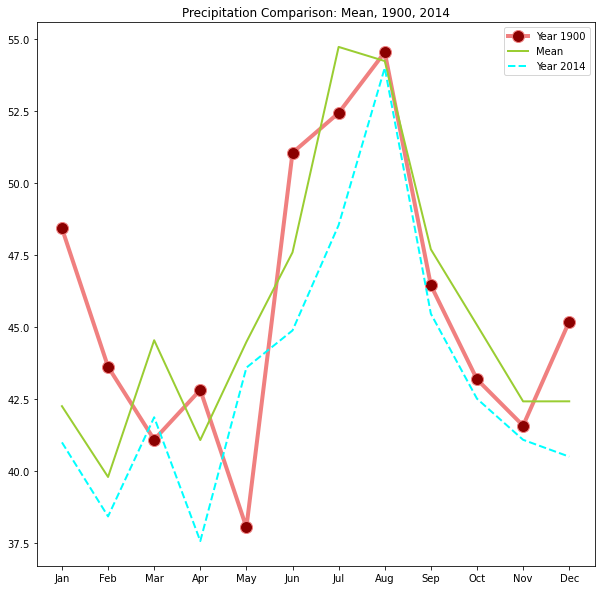

In [66]:
# Plotting the mean monthly Precipitation in the year 1900 vs the mean of all years vs the year 2014 
plt.figure(figsize=(10, 10))
plt.title("Precipitation Comparison: Mean, 1900, 2014")

plt.plot(listMonths,Precip1900, label="Year 1900",marker='o',markerfacecolor='darkred',markersize=12,color='lightcoral',
         linewidth=4)

plt.plot(listMonths,meanPrecip, label="Mean",marker='',color='yellowgreen',
         linewidth=2)

plt.plot(listMonths,Precip2014, label="Year 2014",marker='',color='cyan',
         linewidth=2, linestyle = "dashed")

# plt.label("Year 1900")
plt.legend()
fig1 = plt.gcf()
plt.show()


fig1.savefig('precippppp.png', bbox_inches='tight')

In [27]:
# Now let's plot the trends in mean monthly Temperature in the year 1900 vs the mean of all years vs the year 2014 


new2 = df1.describe()
new2 = new2.astype(float)
listMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for m in listMonths:
    listY = []
    # List of January months
    for x in range(1900,2015):
        yearS = str(x)
        month = m+ " " + yearS
        listY.append(month)

    # print(listY)
    # new1.convert_objects(convert_numeric=True).head()

    # Add mean columns of January
    new2["Avg"+m] = new2[listY].mean(axis=1)

#     new1["AvgJan"]

In [28]:
# Printing out mean monthly temperature of mean of all years
meanTemp = []
for m in listMonths:
    meanTemp.append(new2["Avg"+m]["mean"])

print (meanTemp)

# Printing out mean monthly temperature of year 1900
Temp1900 = []
for m in listMonths:
    Temp1900.append(new2[m+" 1900"]["mean"])

print(Temp1900)

# Printing out mean monthly temperature of year 2014
Temp2014 = []
for m in listMonths:
    Temp2014.append(new2[m+" 2014"]["mean"])

Temp2014

[-7.436555348453474, -9.073614634042505, -9.1744681648965, -6.910142981519938, -3.9133071736039082, -1.551567201922502, -0.6835402698678623, -1.4546657666341318, -3.102605198904147, -4.666632844498097, -5.694412237199119, -6.320863189986943]
[-8.415361214070925, -9.0448714362311, -8.795384292607785, -6.884104949064119, -3.7499475487796783, -1.5428969391798921, -1.2465219012984567, -1.6077895890155576, -2.9789390866494023, -4.2512215306431225, -5.945491526213908, -6.309593910996009]


[-6.855600624752311,
 -9.36664218943026,
 -8.996130265519659,
 -5.943503042170706,
 -2.4533627060167467,
 -0.8774891018019868,
 -0.8037356924726528,
 -0.6801419679697651,
 -2.226570622654268,
 -4.361294496118648,
 -5.511663985826508,
 -5.637958365386899]

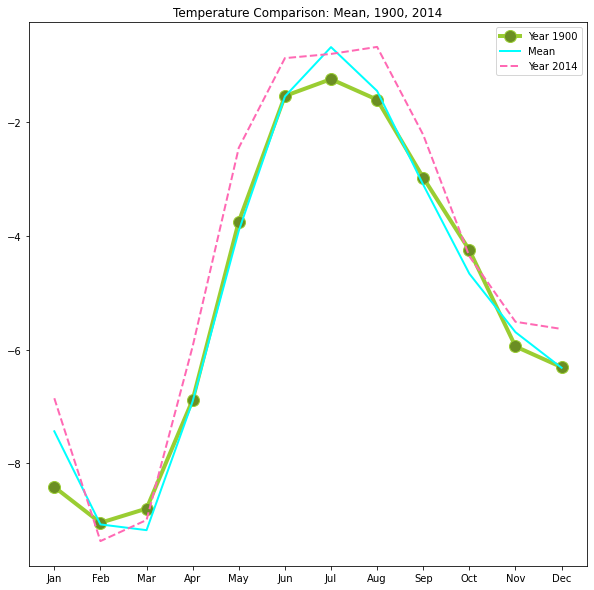

In [67]:
# Plotting the mean monthly Temperature in the year 1900 vs the mean of all years vs the year 2014 
plt.figure(figsize=(10, 10))
plt.title("Temperature Comparison: Mean, 1900, 2014")

plt.plot(listMonths,Temp1900, label="Year 1900",marker='o',markerfacecolor='olivedrab',markersize=12,color='yellowgreen',
         linewidth=4)

plt.plot(listMonths,meanTemp, label="Mean",marker='',color='cyan',
         linewidth=2)

plt.plot(listMonths,Temp2014, label="Year 2014",marker='',color='hotpink',
         linewidth=2, linestyle = "dashed")

# plt.label("Year 1900")
plt.legend()
fig2 = plt.gcf()

plt.show()

fig2.savefig('tempppppp.png', bbox_inches='tight')

## Executing our model using Linear Regression:

In [46]:
# Find the mean annual precipitation for every location

dfPrecip['mean'] = dfPrecip.mean(axis=1)
dfPrecip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,mean
0,17.906886,11.710341,1.247260e+01,4.905435,3.059161,5.958738e+00,1.024784e+01,1.200584e+01,1.559985e+01,1.147546e+01,10.228974,8.500942e+00,10.339339
1,27.772241,22.034911,1.751727e+01,9.456831,23.178640,1.534989e+01,2.868153e+01,3.378672e+01,4.942416e+01,4.055705e+01,30.885323,2.619417e+01,27.069895
2,28.057248,25.427971,1.857660e+01,9.217719,29.491328,1.529094e+01,3.255547e+01,3.415742e+01,4.155990e+01,4.043054e+01,31.840381,2.742965e+01,27.836263
3,30.724294,31.681006,2.110698e+01,10.539274,37.674670,1.769305e+01,4.213071e+01,3.787658e+01,3.814262e+01,3.952282e+01,34.343405,3.151094e+01,31.078863
4,33.887307,38.706987,2.434751e+01,12.559512,42.270961,2.022752e+01,5.418735e+01,4.210935e+01,3.707040e+01,3.738716e+01,39.224153,3.759461e+01,34.964401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85789,0.050000,0.009071,2.372787e-07,0.010156,0.022266,3.439163e-09,2.270498e-07,9.894113e-10,3.434279e-09,2.443962e-05,0.000303,2.502983e-07,0.007652
85790,0.100000,0.006238,2.258466e-07,0.009570,0.021680,2.372254e-09,1.434443e-07,7.513912e-10,2.667238e-09,1.224385e-05,0.000297,3.126629e-03,0.011744
85791,0.100000,0.004395,3.908398e-04,0.009180,0.021289,1.491885e-09,8.368202e-08,5.254227e-10,1.902378e-09,4.835544e-08,0.000295,1.562958e-02,0.012598
85792,0.100098,0.002478,3.125206e-03,0.008594,0.021289,8.120668e-10,4.784343e-08,2.965450e-10,1.144090e-09,4.806924e-08,0.000294,1.850785e-01,0.026746


## Finding best train-test split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

mse = []
possible_splits = [0.10,0.15,0.20,0.25,0.30]
for sz in possible_splits:
    # Finding the best train-test split
    X_train, X_test, y_train, y_test = train_test_split(dfTemp, dfPrecip['mean'], test_size=sz)

    # Linear Regression
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    my_pred = regr.predict(X_test)

    # The mean squared error
    current_mse = mean_squared_error(y_test, my_pred)
    mse.append(current_mse)
    print('Mean squared error: %.2f'
          % current_mse)


Mean squared error: 1775.05
Mean squared error: 1808.93
Mean squared error: 1751.75
Mean squared error: 1817.26
Mean squared error: 1770.22


In [60]:
# Finding the best split
n = np.argmin(mse)

print ('The best test size for train-test split is', possible_splits[n])

The best test size for train-test split is 0.2


## Training our model with the 80-20 split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfTemp, dfPrecip['mean'], test_size=0.20)

In [48]:
#  Right now our dataset looks like this: 
#        X = X_train   + X_test 
# 80K rows = 60k rows + 20k rows 

#        y = y_train   + y_test 
# 80K rows = 60k rows + 20k rows  

In [50]:
from sklearn import datasets, linear_model

# Linear Regression
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

## Prediciting on our model

In [64]:
my_pred = regr.predict(X_test)

## Analyzing the results

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, my_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, my_pred))

Coefficients: 
 [-2.28791131  4.57552108 -2.26940253  1.89933999 -1.58942057 -0.76093129
  3.0483552   1.00016227 -3.03739748  0.06332089 -1.73389818  2.45792963]
Mean squared error: 1785.76
Coefficient of determination: 0.34


In [90]:
import statsmodels.api as sm
from scipy import stats


diabetes = datasets.load_diabetes()
X = dfTemp
y = dfPrecip['mean']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3714.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:49:47   Log-Likelihood:            -4.4355e+05
No. Observations:               85794   AIC:                         8.871e+05
Df Residuals:                   85781   BIC:                         8.873e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9556      0.293    194.397      0.0

**Observation:** We see that only the mean temperatures in February, April, July, August, and December have an impact on the mean precipitation. This is because the t-values of these variables are considerably bigger than 0. The mean squared error on this model is also the least among all the other models.


## Thus our Equation for Linear regression model looks like this:
(without including random error)
<pre>
**y = -2.2737 * X1 + 4.5432 * X2 - 2.2279 * X3 + 1.8786 * X4  - 1.5960 * X5  - 0.7114 * X6  + <br>
       2.9740 * X7 + 0.9925 * X8 - 2.9911 * X9 + 0.0591 * X10 - 1.6936 * X11 + 2.4070 * X12 + 56.9556** </pre>
     
Here, <br>
<br>
**y** = Annual mean precipitation<br>
**X1** = Monthly mean temperature in January<br>
**X2** = Monthly mean temperature in February<br>
**X3** = Monthly mean temperature in March<br>
**X4** = Monthly mean temperature in April<br>
**X5** = Monthly mean temperature in May<br>
**X6** = Monthly mean temperature in June<br>
**X7** = Monthly mean temperature in July<br>
**X8** = Monthly mean temperature in August<br>
**X9** = Monthly mean temperature in Sepetember<br>
**X10** = Monthly mean temperature in October<br>
**X11** = Monthly mean temperature in November<br>
**X12** = Monthly mean temperature in December<br>
     
     

## Plotting our linear regression for each feature

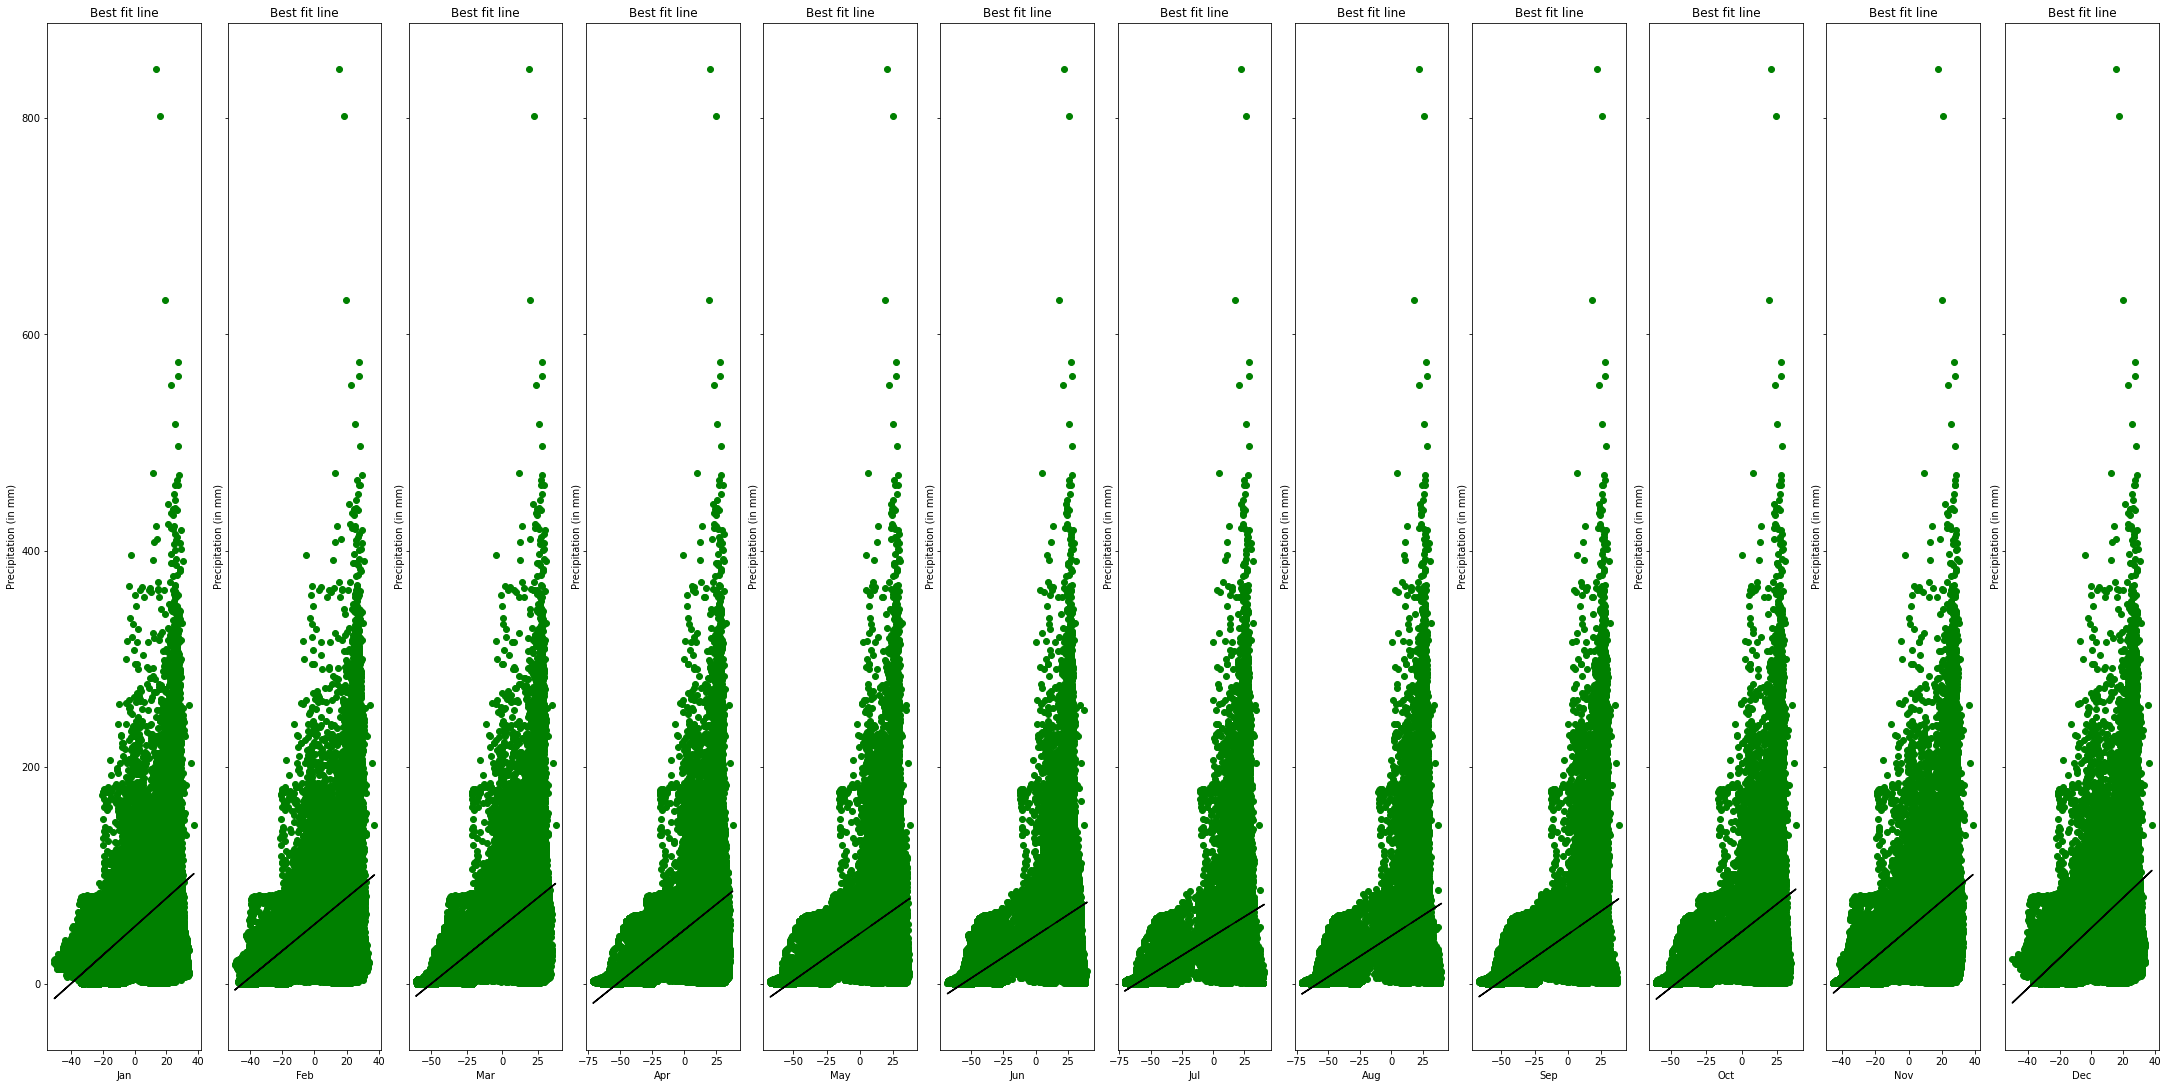

In [77]:
# Plotting our linear regression for every feature
# Reference: https://stackoverflow.com/a/52464283

train_copy =pd.get_dummies(X_train)
train_copy=train_copy.fillna(0)
clf = linear_model.LinearRegression()

fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(train_copy.columns):
  clf.fit(train_copy[e].values[:,np.newaxis], y_train)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Precipitation (in mm)')
  axes[i].scatter(train_copy[e].values[:,np.newaxis], y_train,color='g')
  axes[i].plot(train_copy[e].values[:,np.newaxis], 
  clf.predict(train_copy[e].values[:,np.newaxis]),color='k')

**Observation:** We see that as the Temperature increases, our linear regression model faces more outliers, which is what accounts for more errors for the model

## Plotting our predicted y and actual test y to see how they coincide

(17159, 12)
(17159,)
(17159,)
17159


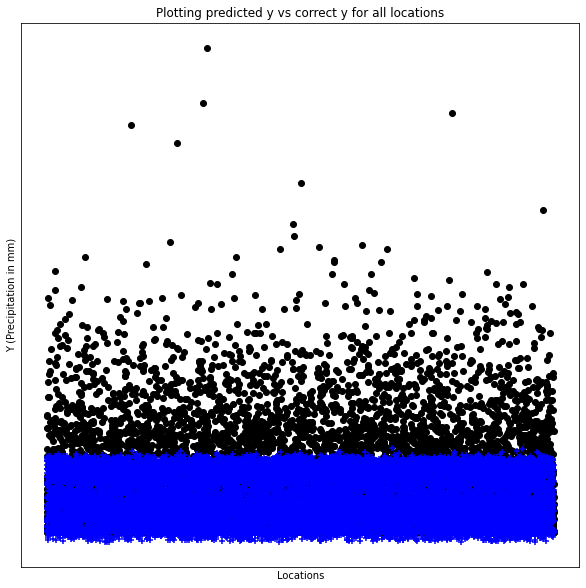

In [91]:
## Plotting our predicted y and actual test y to see how they coincide
plt.figure(figsize=(10, 10))
print(X_test.shape)
print(y_test.shape)
print(my_pred.shape)

myListMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
myEx = list(range(1,17160))

print(len(myEx))

# Plot outputs
plt.scatter(myEx, y_test,  color='black')
plt.scatter(myEx, my_pred, color='blue',marker='+')
plt.xlabel('Locations')
plt.ylabel('Y (Precipitation in mm)')
plt.title('Plotting predicted y vs correct y for all locations')
plt.xticks(())
plt.yticks(())

plt.show()

**Observation:** We do see that values in the lower range are better predicted. Let's take only the first 100 values for a better view

(17159, 12)
(17159,)
(17159,)
17159


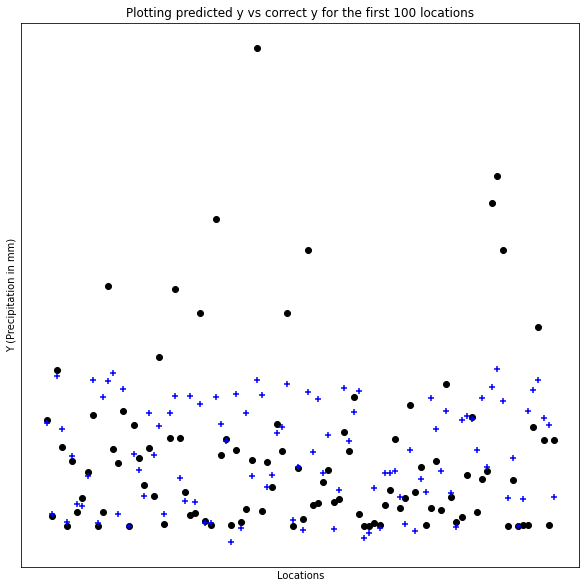

In [100]:

plt.figure(figsize=(10, 10))
print(X_test.shape)
print(y_test.shape)
print(my_pred.shape)

myListMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
myEx = list(range(1,17160))

print(len(myEx))

# Plot outputs
plt.scatter(myEx[:100], y_test[:100],  color='black')
plt.scatter(myEx[:100], my_pred[:100], color='blue', marker='+')
plt.xlabel('Locations')
plt.ylabel('Y (Precipitation in mm)')
plt.title('Plotting predicted y vs correct y for the first 100 locations')
plt.xticks(())
plt.yticks(())
plt.show()

**Observation**: We thus see that the model predicts the values correctly for those locations who have a lower precipitation value. As the value increase and as there are more outliers, the model somewhat fails to predict those values correctly

## Common FAQs for this model:

**What are the features of the model? Why?** <br>
The features of the model are each of the months of January, February, March, April, May, June, July, August, Sepetember, October, November, and December. The reason for choosing these features is because the trends in annual precipitation vary vastly with respect to monthly temperature depending on which month of the year it is. <br>
A small practical example of this could be that these days we experience more fluctuations in precipitation in some months, when all of the months have almost same changes in temperature due to global warming

**How was the data cleaned?**
We checked if there are any null values, and while there were not any, we did spot some 0 values, which means the data was already cleaned before usage

## Conclusion:

Mean Annual Precipitations is influenced by the mean monthly temperatures in the months of February, April, July, August, and December. Therefore, it might be more probable to experience sudden, unexpected or excessive rainfall in these months over a year. Lastly, there is a relationship between the global mean monthly temperatures and annual precipitation based on the results of our model. In conclusion, our findings would be extremely helpful in deciding the plan of action taken by humans in order to protect from the dangers of climate change.
